# Inference and Analysis on the Relation Between Education and Salary

### STAT 201 Project Proposal - Group 8
##### Members: Aarav Mahajan, Ben Jia, Luke Joe, Xiaowei Zhao
***

## Introduction
It is well known around the world that those with higher education are typically paid more than those without. In 2018, workers in their 40s with a university degree are paid 53% more than those without higher education on average (Park et al., 2020). Though numbers like these are meaningful, it is important to note that this average may be skewed due to high outliers, causing an unfair representation of the salaries of most people with higher education. Additionally, suppose people are only concerned with meeting a minimum salary. In this case, perhaps we would be more interested in the proportion of adults that exceed a given salary threshold, sorted by varying levels of education. This way we can infer if there is a relationship between education and meeting the salary threshold of interest. This leads to the following question that we aim to answer through this project:

Is the proportion of working adults with higher education (i.e. bachelors, doctorate) and a salary greater than \\$50,000 noticeably greater than the proportion of working adults without higher education (i.e. high school) and a salary greater than \\$50,000?

To answer this question, we will make use of the “Adult” dataset, which is a dataset extracted by Barry Becker from the 1994 US Census, found on the UCI Machine Learning Repository. This dataset contains 48842 instances (rows) and 14 attributes (columns). Among the attributes, noteworthy categories include age, education, marital status, occupation, race, sex, work hours per week, and salary (either >50K or <=50K). In our project, we will be focusing on education and salary. 

***

## Preliminary Results

Let us start our preliminary processing and findings. Firstly, let us load the necessary libraries and read in the dataset (with column names):

In [1]:
# Run this cell before continuing.
library(infer)
library(repr)
library(tidyverse)

adult <- read_csv("https://raw.githubusercontent.com/Ehsian/STAT201-Group-Project/main/adult.csv")
head(adult)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital-status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


As mentioned in the introduction, we will be focusing on education and salary, so we select only those two columns:

In [2]:
adult_selected <- adult |>
    select(education,salary)
head(adult_selected)

education,salary
<chr>,<chr>
Bachelors,<=50K
Bachelors,<=50K
HS-grad,<=50K
11th,<=50K
Bachelors,<=50K
Masters,<=50K


After selecting the important columns, we can see that the `education` column is not very ideal for grouping, as there are too many different categories to group by. Recall that our goal in this project is to find the distinction between those with "higher level education" and those without. Thus, we would want to group by these two values. Let us change the `education` column to reflect this.

Note that we know the categories within `education` are the following: {Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.}
|
For our purposes, any form of education after high school counts as `higher_level`, and all other categories will fall under `not_higher_level`.

In [3]:
new_edu_values <- function(value) {
    if (value == "Bachelors" | value == "Some-college" | value == "Prof-school" | value == "Assoc-acdm" | value == "Assoc-voc" | value == "Masters" | value == "Doctorate") {
        "higher_level" # Return "higher_level" if the given value is any of the above
    } else {
        "not_higher_level" # Otherwise, return "not_higher_level"
    }
}

adult_tidy <- adult_selected |>
    mutate(education = apply(adult_selected["education"], 1, new_edu_values))

head(adult_tidy)

education,salary
<chr>,<chr>
higher_level,<=50K
higher_level,<=50K
not_higher_level,<=50K
not_higher_level,<=50K
higher_level,<=50K
higher_level,<=50K


Now that the data is in the form we want it, let's plot the distribution! We will use a bar plot, color separated to visualize the proportions which we will calculate soon after.

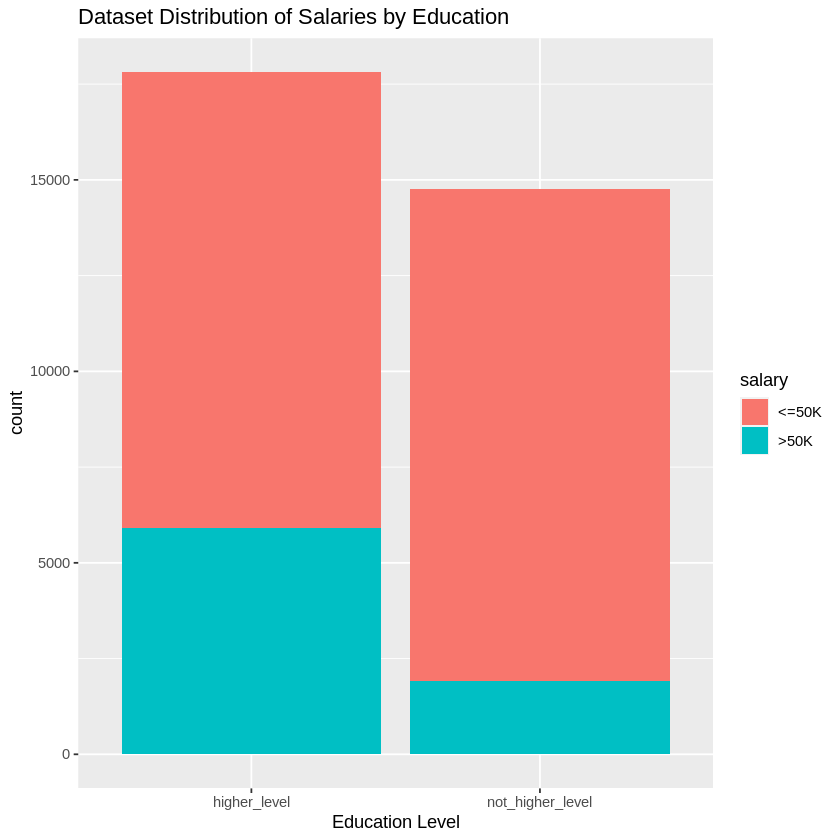

In [4]:
adult_plot <- adult_tidy |>
    ggplot(aes(x=education,fill=salary)) +
    geom_bar() +
    ggtitle("Dataset Distribution of Salaries by Education") +
    xlab("Education Level")

adult_plot

In [5]:
adult_table <- adult_tidy |>
    group_by(education,salary) |>
    summarize(n=n())
adult_table

`summarise()` has grouped output by 'education'. You can override using the
`.groups` argument.


education,salary,n
<chr>,<chr>,<int>
higher_level,<=50K,11885
higher_level,>50K,5922
not_higher_level,<=50K,12835
not_higher_level,>50K,1919


The above table allows us to calculate the proportions we are interested in. Namely, the proportion of people with higher level education with >50K salary and the proportion of people without higher level education with >50K salary.

Now, let us compute the proportions using this data:

In [6]:
adult_prop_table <- tibble(n_higher_level = 5922+11885, 
                           p_higher_level = 5922/n_higher_level, 
                           n_not_higher_level = 1919+12835, 
                           p_not_higher_level = 1919/n_not_higher_level, 
                           diff_in_p = p_higher_level-p_not_higher_level)
adult_prop_table

n_higher_level,p_higher_level,n_not_higher_level,p_not_higher_level,diff_in_p
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17807,0.3325658,14754,0.1300664,0.2024994


Thus, the point estimate for the difference in proportion of adults with salaries greater than $50,000 between those with and without higher education is `0.2024994`.

***

## Expectations

So far, in this proposal, we introduced the question we would like to explore further and applied simple and learned tactics to adequately display and obtain preliminary information regarding the sample distribution and the sample point estimate.
To summarize the previous section (Preliminary Results), we found a point estimate for the difference in proportion of adults with salaries greater than \\$50,000 between those with and without higher education. This point estimate for the difference in proportions came out to be 0.2024994, or roughly 20.2%. 

However, this alone is not enough evidence to conclude that having higher education is statistically better than not having higher education when it comes to making a \\$50,000 salary. Firstly, the data from which we extracted our point estimate is merely a subset of the entire adult population of the United States. This means our estimate is not necessarily indicative of the true population statistic. Secondly, we have not yet appropriately tested for statistical significance. For this, we will need to create a confidence interval for the true difference in proportions (involving bootstrapping), as well as a hypothesis test with $H_0$: `diff_in_p = 0` and $H_A$: `diff_in_p > 0`.

Despite not yet having sufficient analysis, we can still hypothesize what we expect our results to be. We expect to find that the proportion of working adults with higher education and a salary greater than \\$50,000 will be noticeably greater than the proportion of working adults without higher education and a salary greater than \\$50,000. As concluded in a 2016 study, there is a positive correlation between education level and family income for US residents (Smith et al., 2013). In 2015, it was also found that the median earnings of adults with a bachelor’s degree who were working full time were paid $24,600 (67%) higher than those of high school graduates. Overall, median earnings increased with the level of education. 

Such findings could allow families and students to make a more informed decision about their academics. By looking at the difference in proportion of adults with salaries greater than \\$50,000 between those with and without higher education, individuals can better assess the value of and whether it’s in their best interest to pursue further education.

The results of this investigation could lead to the questions related to how higher education affects job performance and whether or not higher education should be made more accessible to more of the population.

***

## References

Becker, B., & Kohavi, R. (1996, April 30). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20

Ma, J., Pender, M., &amp; Welch, M. (2015, November 30). Education pays 2016: The benefits of higher education for individuals and society. trends in higher education series. College Board. https://eric.ed.gov/?id=ED572548 

Park, Y., Galassi, G., & Kyui, N. (2020, October 7). Learning and earning. Bank of Canada. https://www.bankofcanada.ca/2020/10/learning-and-earning/#:~:text=In%20both%201997%20and%202015,those%20with%20no%20higher%20education

Smith, T. W., Hout, M., &amp; Marsden, P. V. (2013, September 11). General Social Survey, 1972-2012 [cumulative file]. General Social Survey, 1972-2012 [Cumulative File]. https://www.icpsr.umich.edu/web/ICPSR/studies/34802/versions/V1  